In [1]:
from utils import *
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from statistics import mode
from tslearn.clustering import TimeSeriesKMeans
import hdbscan
movie_timeline = np.load(os.path.join('data', 'movie_timeline.npy'), allow_pickle=True).tolist()

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/tslearn/clustering/kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


567
52
cur_min 2
[[1.         0.78701136 0.78229003 ... 0.66004843 0.74764413 0.81108132]
 [0.78701136 1.         0.91460778 ... 0.863181   0.87903211 0.87604583]
 [0.78229003 0.91460778 1.         ... 0.81219213 0.8183281  0.83335783]
 ...
 [0.66004843 0.863181   0.81219213 ... 1.         0.85712923 0.84011219]
 [0.74764413 0.87903211 0.8183281  ... 0.85712923 1.         0.89175145]
 [0.81108132 0.87604583 0.83335783 ... 0.84011219 0.89175145 1.        ]]
0
cur_min 3
[[1.         0.78701136 0.78229003 ... 0.66004843 0.74764413 0.81108132]
 [0.78701136 1.         0.91460778 ... 0.863181   0.87903211 0.87604583]
 [0.78229003 0.91460778 1.         ... 0.81219213 0.8183281  0.83335783]
 ...
 [0.66004843 0.863181   0.81219213 ... 1.         0.85712923 0.84011219]
 [0.74764413 0.87903211 0.8183281  ... 0.85712923 1.         0.89175145]
 [0.81108132 0.87604583 0.83335783 ... 0.84011219 0.89175145 1.        ]]
0
cur_min 4
[[1.         0.78701136 0.78229003 ... 0.66004843 0.74764413 0.81108132

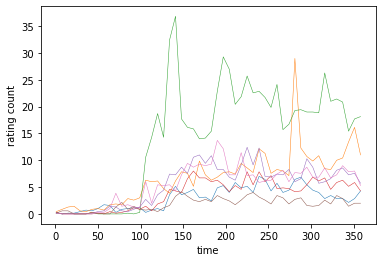

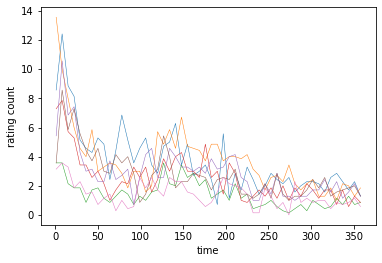

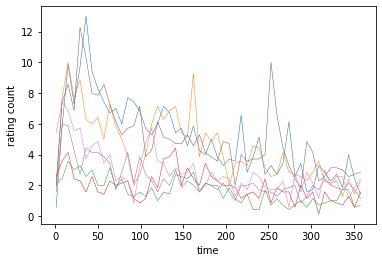

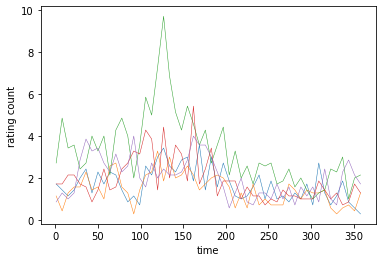

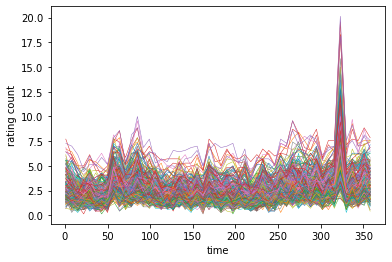

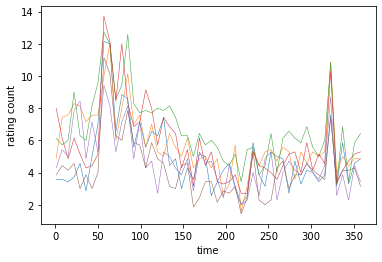

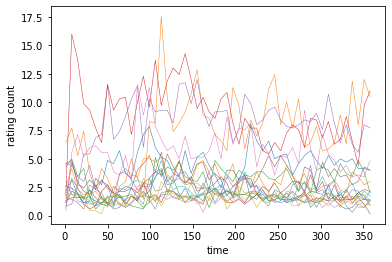

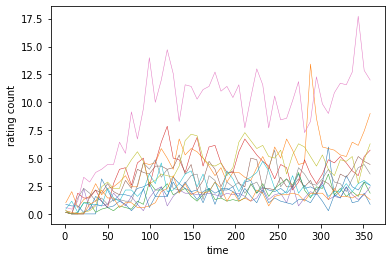

In [2]:
# a = [1, 1, 1, 1, 1]
# b = [2, 2, 2, 2, 2]
# c = [1, 1, -1, -1, 0.1]
# d = [2, 2, -2, -2, 0.2]
# test2 = [a, b, c, d]
# dist_out = 1-pairwise_distances(test2, metric="cosine")
# clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
# cluster_labels = clusterer.fit_predict(dist_out)
# print(dist_out)
# print(cluster_labels)
train_X = []
for movie in movie_timeline:
    timeline = movie_timeline[movie]
    start_index = 0
    while(timeline[start_index] == 0):
        start_index += 1
    one_year_since_release = timeline[start_index : start_index + 364]
    if len(one_year_since_release) == 364 and sum(one_year_since_release) >= 500:
        temp = []
        for i in range(0, 364, 7):
            temp.append(sum(one_year_since_release[i:i+7]) / 7)
        train_X.append([i for i in temp])        
#         train_X.append([i for i in one_year_since_release])
print(len(train_X))
print(len(train_X[0]))
for cur_min_samples in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print('cur_min', cur_min_samples)
    dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
    print(dist_train_X)
    cluster_model = hdbscan.HDBSCAN(min_cluster_size=cur_min_samples, metric='precomputed')
    res = cluster_model.fit_predict(dist_train_X)
    resl = [i for i in res.tolist() if i != -1]
    print(len(resl))
    if len(resl) != 0:
        mode_num = mode(resl)
        print(mode_num, max(resl), len(set(resl)))
        resll = [i for i in resl if i != mode_num]
        print(len(resll))
        print(resll)

dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
cluster_model = hdbscan.HDBSCAN(min_cluster_size=5)
res = cluster_model.fit_predict(dist_train_X)
resl = [i for i in res.tolist() if i != -1]
print(len(resl))
if len(resl) != 0:
    mode_num = mode(resl)
    print(mode_num, max(resl), len(set(resl)))
    resll = [i for i in resl if i != mode_num]

clustered_timeline = [[], [], [], [], [], [], [], []]
results = res.tolist()
for i in range(len(train_X)):
    timeline = [item for item in train_X[i]]
    if res[i] != -1:
        clustered_timeline[res[i]].append(timeline)

for cluster_num in range(8):
    print(len(clustered_timeline[cluster_num]))
    fig, ax = plt.subplots()
    temp_x = [i for i in range(1, 365, 7)]
    for i in range(len(clustered_timeline[cluster_num])):
        ax.plot(temp_x,
                clustered_timeline[cluster_num][i],
                linewidth=0.5)
    ax.set_xlabel('time')
    ax.set_ylabel('rating count')
    fig.savefig('./figures/timeline_clustering_figures/hdbscan_cosine_th_500'
                + str(cluster_num), bbox_inches='tight', dpi=300)


2738
52
cur_min 2
2737
0 1 2
5
[1, 1, 1, 1, 1]
cur_min 3
2737
0 1 2
5
[1, 1, 1, 1, 1]
cur_min 4
2736
0 1 2
5
[1, 1, 1, 1, 1]
cur_min 5
2736
0 1 2
5
[1, 1, 1, 1, 1]
cur_min 6
756
6 7 8
104
[7, 7, 7, 7, 7, 7, 4, 4, 1, 1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 3, 3, 5, 5, 0, 0, 1, 0, 5, 3, 3, 5, 3, 3, 5, 0, 5, 1, 1, 2, 5, 5, 5, 3, 5, 3, 3, 5, 5, 5, 3, 5, 2, 5, 5, 5, 3, 5, 1, 3, 5, 5, 5, 5, 5, 3, 3, 5, 1, 5, 2, 0, 2, 1, 2, 1, 2, 1, 5, 1, 5, 3, 2]
cur_min 7
955
4 5 6
76
[3, 3, 0, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 5, 3, 3, 2, 2, 5, 5, 5, 0, 5, 2, 2, 5, 2, 2, 5, 5, 0, 0, 1, 5, 5, 5, 2, 5, 2, 2, 5, 2, 5, 1, 5, 5, 5, 2, 5, 0, 2, 5, 5, 5, 2, 2, 0, 5, 1, 1, 1, 0, 1, 0, 5, 2, 0, 1, 5, 2, 1]
cur_min 8
901
1 2 3
33
[0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0]
cur_min 9
911
2 3 4
41
[1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3

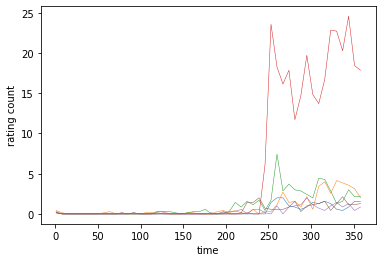

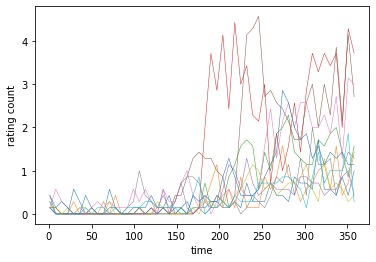

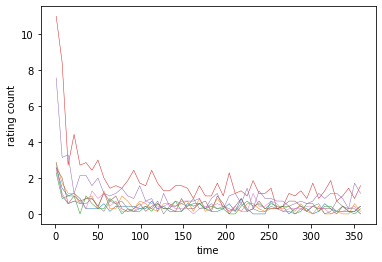

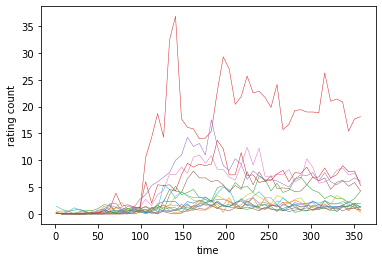

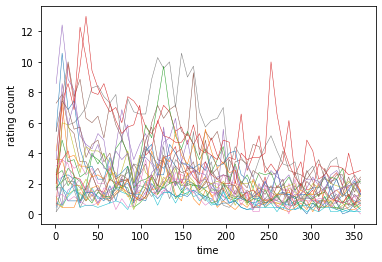

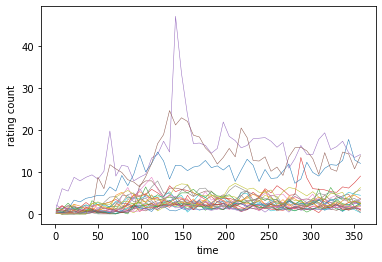

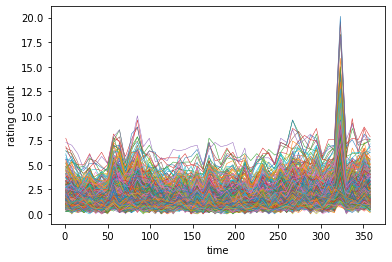

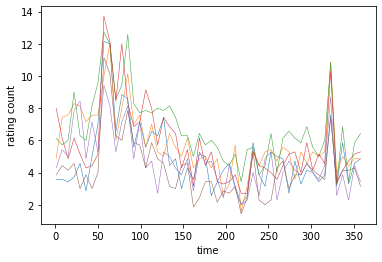

In [3]:
train_X = []
for movie in movie_timeline:
    timeline = movie_timeline[movie]
    start_index = 0
    while(timeline[start_index] == 0):
        start_index += 1
    one_year_since_release = timeline[start_index : start_index + 364]
    if len(one_year_since_release) == 364 and sum(one_year_since_release) >= 100:
        temp = []
        for i in range(0, 364, 7):
            temp.append(sum(one_year_since_release[i:i+7]) / 7)
        train_X.append([i for i in temp])        
#         train_X.append([i for i in one_year_since_release])
print(len(train_X))
print(len(train_X[0]))
cluster_detail = []
for cur_min_samples in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print('cur_min', cur_min_samples)
    dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
    cluster_model = hdbscan.HDBSCAN(min_cluster_size=cur_min_samples)
    res = cluster_model.fit_predict(dist_train_X)
    resl = [i for i in res.tolist() if i != -1]
    print(len(resl))
    mode_num = mode(resl)
    print(mode_num, max(resl), len(set(resl)))
    resll = [i for i in resl if i != mode_num]
    print(len(resll))
    print(resll)
    cluster_detail.append([len(set(resl)), len(res) - len(resl), len(resll)])

dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
cluster_model = hdbscan.HDBSCAN(min_cluster_size=6)
res = cluster_model.fit_predict(dist_train_X)
resl = [i for i in res.tolist() if i != -1]
print(len(resl))
mode_num = mode(resl)
print(mode_num, max(resl), len(set(resl)))
resll = [i for i in resl if i != mode_num]
print(len(resll))

clustered_timeline = [[], [], [], [], [], [], [], []]
results = res.tolist()
for i in range(len(train_X)):
    timeline = [item for item in train_X[i]]
    if res[i] != -1:
        clustered_timeline[res[i]].append(timeline)

for cluster_num in range(8):
    print(len(clustered_timeline[cluster_num]))
    fig, ax = plt.subplots()
    temp_x = [i for i in range(1, 365, 7)]
    for i in range(len(clustered_timeline[cluster_num])):
        ax.plot(temp_x,
                clustered_timeline[cluster_num][i],
                linewidth=0.5)
    ax.set_xlabel('time')
    ax.set_ylabel('rating count')
    fig.savefig('./figures/timeline_clustering_figures/hdbscan_cosine_th_100'
                + str(cluster_num), bbox_inches='tight', dpi=300)

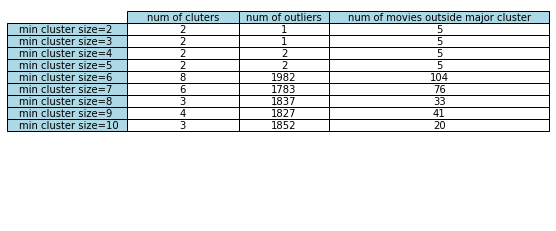

In [4]:
fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table(
    cellText = cluster_detail,
    rowLabels = ['min cluster size=' + str(value) for value in range(2, 11)],
    colLabels = ['num of cluters', 'num of outliers', 'num of movies outside major cluster'],
    rowColours = ["lightblue"] * len(cluster_detail),  
    colColours = ["lightblue"] * len(cluster_detail[0]), 
    cellLoc ='center',
    loc ='upper center',
)
table.auto_set_column_width(col=[1,2,3,4])
bbox = table.get_window_extent(fig.canvas.get_renderer())
bbox = bbox.from_extents(bbox.xmin-5, bbox.ymin-5, bbox.xmax+5, bbox.ymax+25)
bbox_inches = bbox.transformed(fig.dpi_scale_trans.inverted())
fig.savefig('./figures/timeline_clustering_figures/hdbscan_cosine_detail', bbox_inches=bbox_inches, dpi=300)

In [ ]:
train_X = []
original_X = []
km_centers = []
for movie in movie_timeline:
    timeline = movie_timeline[movie]
    start_index = 0
    while(timeline[start_index] == 0):
        start_index += 1
    one_year_since_release = timeline[start_index : start_index + 364]
    if len(one_year_since_release) == 364 and sum(one_year_since_release) >= 100:
        temp = []
        original = []
        for i in range(0, 364, 7):
            original.append(sum(one_year_since_release[i:i+7]) / 7)
        for j in range(1, len(original)):
            cur = 0
            diff = original[j] - original[j - 1]
            if diff > 0:
                cur = 1
            elif diff < 0:
                cur = -1
            else:
                cur = 0
            temp.append(cur)
        train_X.append(temp)
        original_X.append(original)
print(len(train_X))
print(len(train_X[0]))
for cluster_num in [3, 4, 5, 6, 7, 8]:
    print('cluster_num', cluster_num)
    km = TimeSeriesKMeans(n_clusters=cluster_num, max_iter=10, 
                          metric="dtw", random_state=0)
    res = km.fit_predict(train_X)
#     km_centers.append(km.cluster_centers_)
#     resl = [i for i in res.tolist() if i != -1]
#     print(len(resl))
#     resll = [i for i in resl if i != 1]
#     print(len(resll))
    clustered_timeline = [[], [], [], [], [], [], [], []]
    results = res.tolist()
    for i in range(len(train_X)):
        timeline = [item for item in original_X[i]]
        if res[i] != -1:
            clustered_timeline[res[i]].append(timeline)

    for cluster_id in range(cluster_num):
        print(len(clustered_timeline[cluster_id]))
        temp_x = [i for i in range(len(original_X[0]))]
        fig, ax = plt.subplots()
        for i in range(len(clustered_timeline[cluster_id])):
            ax.plot(temp_x,
                    clustered_timeline[cluster_id][i],
                    linewidth=0.5)
        ax.set_xlabel('time')
        ax.set_ylabel('rating count')
        fig.savefig('./figures/timeline_clustering_figures/kmeansdtw_clustercount_'
                    + str(cluster_num) + '_clusterid_' + str(cluster_id),
                    bbox_inches='tight', dpi=300)

567
51
cluster_num 3
166
265
136
cluster_num 4
151
179
76
161
cluster_num 5
96
171
71
102
127
cluster_num 6
41
161
78
94
107
86
cluster_num 7
37
159
59


<ipython-input-8-788b1d6c9cbe>:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


85
95
82
50
cluster_num 8
14
66
101
93
98
99
32
64


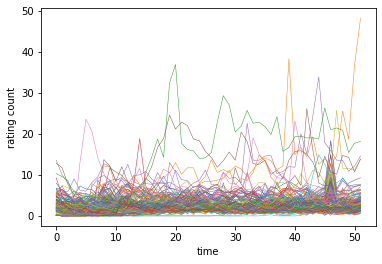

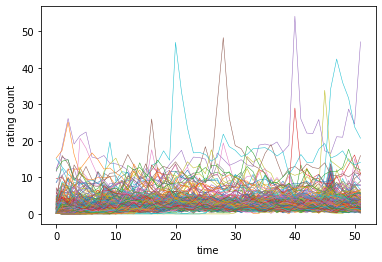

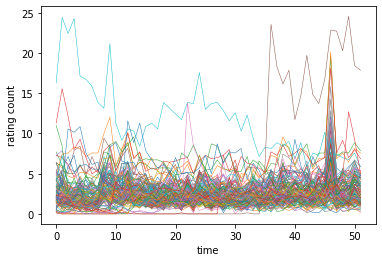

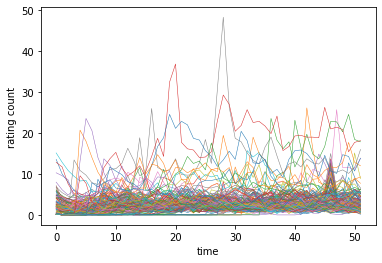

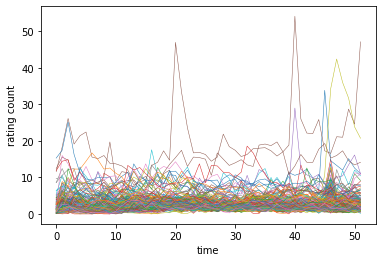

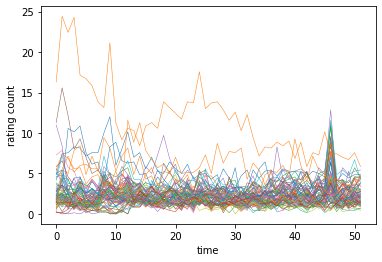

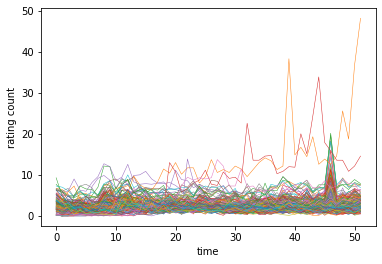

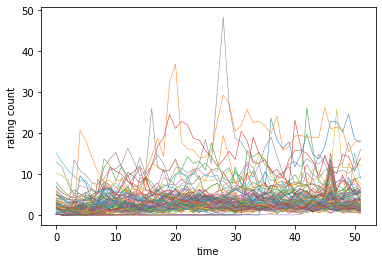

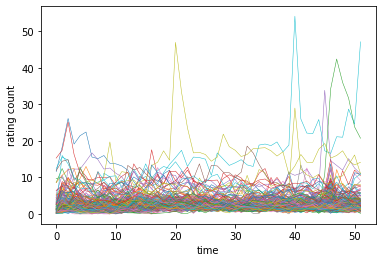

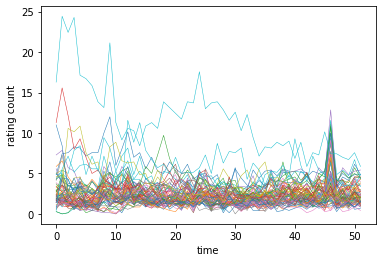

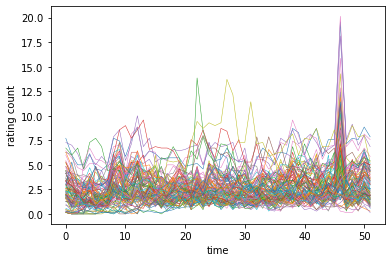

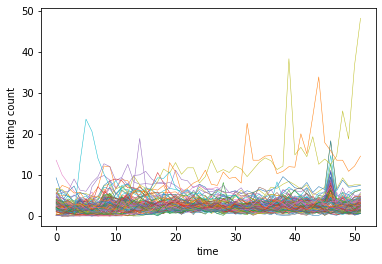

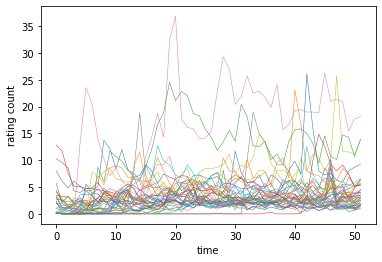

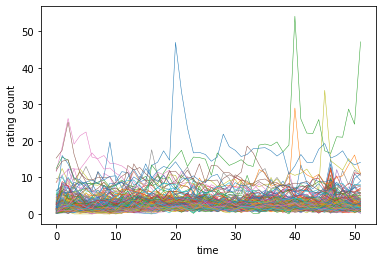

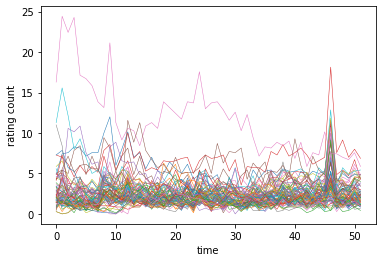

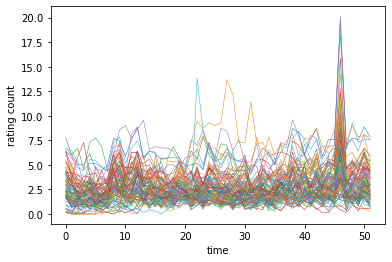

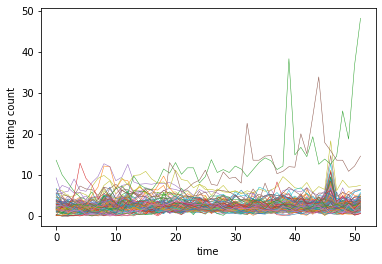

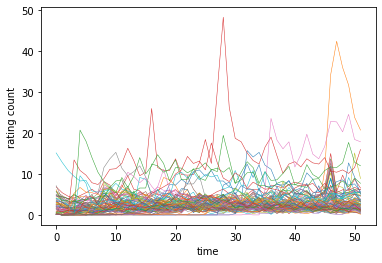

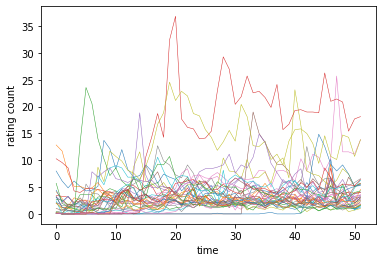

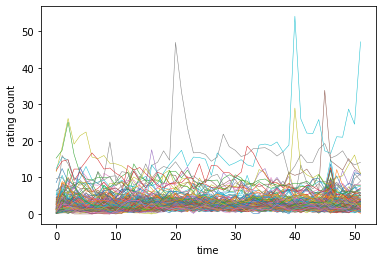

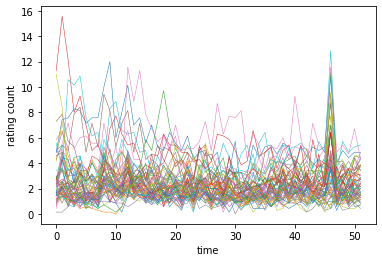

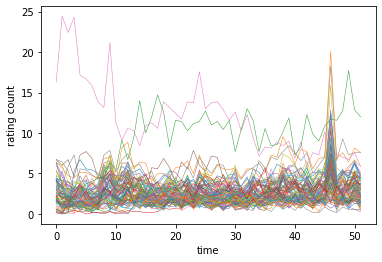

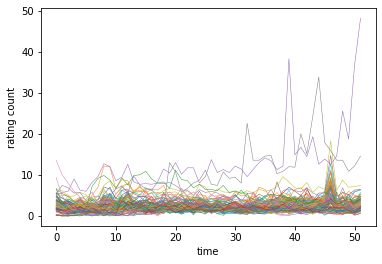

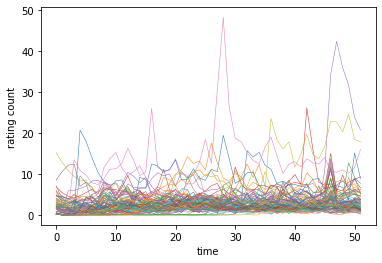

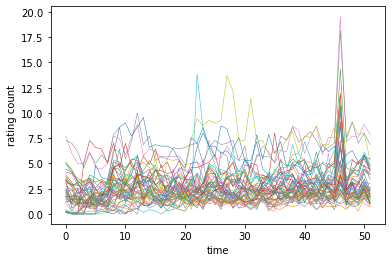

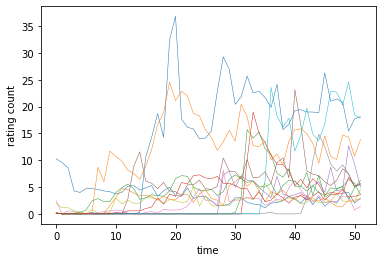

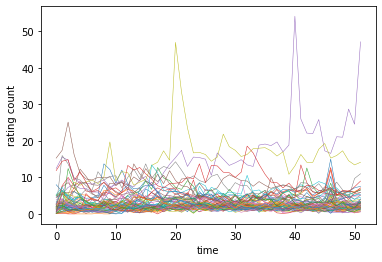

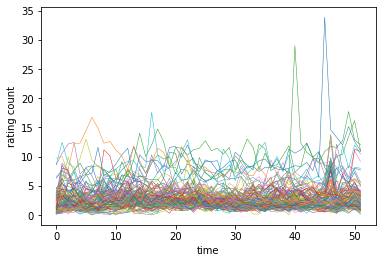

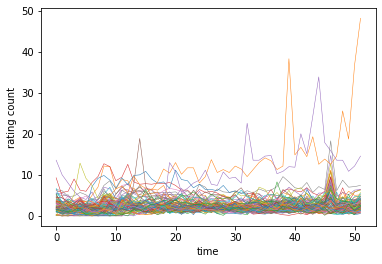

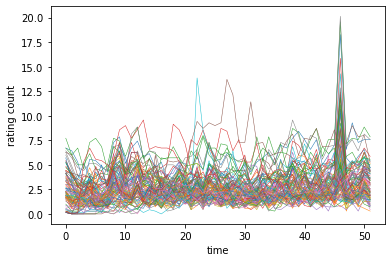

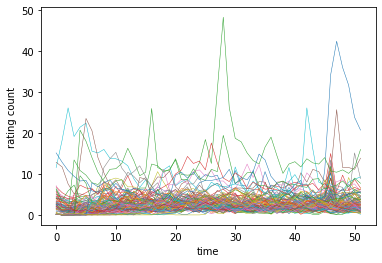

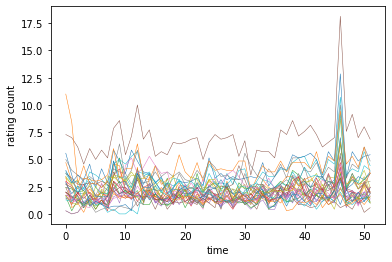

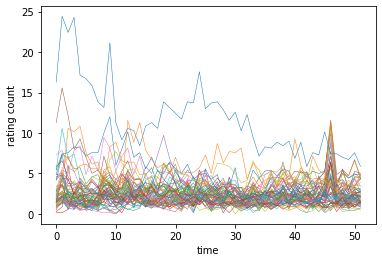

In [8]:
train_X = []
original_X = []
km_centers = []
for movie in movie_timeline:
    timeline = movie_timeline[movie]
    start_index = 0
    while(timeline[start_index] == 0):
        start_index += 1
    one_year_since_release = timeline[start_index : start_index + 364]
    if len(one_year_since_release) == 364 and sum(one_year_since_release) >= 500:
        temp = []
        original = []
        for i in range(0, 364, 7):
            original.append(sum(one_year_since_release[i:i+7]) / 7)
        for j in range(1, len(original)):
            cur = 0
            diff = original[j] - original[j - 1]
            if diff > 0:
                cur = 1
            elif diff < 0:
                cur = -1
            else:
                cur = 0
            temp.append(cur)
        train_X.append(temp)
        original_X.append(original)
print(len(train_X))
print(len(train_X[0]))
for cluster_num in [3, 4, 5, 6, 7, 8]:
    print('cluster_num', cluster_num)
    km = TimeSeriesKMeans(n_clusters=cluster_num, max_iter=10, 
                          metric="dtw", random_state=0)
    res = km.fit_predict(train_X)
#     km_centers.append(km.cluster_centers_)
#     resl = [i for i in res.tolist() if i != -1]
#     print(len(resl))
#     resll = [i for i in resl if i != 1]
#     print(len(resll))
    clustered_timeline = [[], [], [], [], [], [], [], []]
    results = res.tolist()
    for i in range(len(train_X)):
        timeline = [item for item in original_X[i]]
        if res[i] != -1:
            clustered_timeline[res[i]].append(timeline)

    for cluster_id in range(cluster_num):
        print(len(clustered_timeline[cluster_id]))
        temp_x = [i for i in range(len(original_X[0]))]
        fig, ax = plt.subplots()
        for i in range(len(clustered_timeline[cluster_id])):
            ax.plot(temp_x,
                    clustered_timeline[cluster_id][i],
                    linewidth=0.5)
        ax.set_xlabel('time')
        ax.set_ylabel('rating count')
        fig.savefig('./figures/timeline_clustering_figures/kmeansdtw_th_500_clustercount_'
                    + str(cluster_num) + '_clusterid_' + str(cluster_id),
                    bbox_inches='tight', dpi=300)